In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string



C:\Users\nimit\AppData\Local\Temp\ipykernel_9944\3683955025.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
pip install gunicorn


   ---------------------------------------- 0.0/80.2 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/80.2 kB ? eta -:--:--
   -------------------- ------------------- 41.0/80.2 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 80.2/80.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import gunicorn
print(gunicorn.__version__)


21.2.0


In [3]:
import sklearn
print(sklearn.__version__)


1.4.0


In [2]:
import pandas as pd
print(pd.__version__)


2.2.0


In [2]:
data_fake=pd.read_csv("Fake.csv")
data_true=pd.read_csv("True.csv")


In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#checking different subjects and their counts
data_fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [5]:
data_true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [6]:
#creating a class for whether fake or not(as till now we don't have a target)
data_fake['class']=0
data_true['class']=1


In [7]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [9]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [10]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\nimit\AppData\Local\Temp\ipykernel_16260\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\nimit\AppData\Local\Temp\ipykernel_16260\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [11]:

data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data=data_merge.drop(['title','subject','date'],axis=1)

In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
data=data.sample(frac=1)

In [17]:
data.shape

(44878, 2)

In [18]:
data.head()

,text,class
9789,NEW YORK (Reuters) - New York City’s Mayor Bil...,1
10506,The Windy City is under fire for turning publi...,0
6959,Every website has a 404 page that you land on ...,0
19978,Colin Powell really doesn t disclose anything ...,0
11589,PARIS (Reuters) - As he looks back on a moment...,1


In [19]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,NEW YORK (Reuters) - New York City’s Mayor Bil...,1
1,The Windy City is under fire for turning publi...,0
2,Every website has a 404 page that you land on ...,0
3,Colin Powell really doesn t disclose anything ...,0
4,PARIS (Reuters) - As he looks back on a moment...,1


In [22]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text=re.sub('\n', '',text)
    text=re.sub('\w*\d\w*', '',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\nimit\AppData\Local\Temp\ipykernel_16260\2191491106.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\nimit\AppData\Local\Temp\ipykernel_16260\2191491106.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\nimit\AppData\Local\Temp\ipykernel_16260\2191491106.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*', '',text)


In [23]:
data['text']=data['text'].apply(wordopt)

In [24]:
x=data['text']
y=data['class']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)


In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [28]:
prediction_lr=LR.predict(xv_test)
LR.score(xv_test,y_test)

0.9885249554367201

In [29]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4721
           1       0.99      0.99      0.99      4255

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [30]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [31]:
prediction_dt=DT.predict(xv_test)

In [32]:
DT.score(xv_test,y_test)

0.9956550802139037

In [33]:
print(classification_report(y_test,prediction_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4721
           1       1.00      0.99      1.00      4255

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
predict_gb=GB.predict(xv_test)

In [36]:
GB.score(xv_test,y_test)

0.9940953654188949

In [37]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4721
           1       0.99      1.00      0.99      4255

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [38]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)


RandomForestClassifier(random_state=0)

In [39]:
predict_rf=RF.predict(xv_test)

In [40]:
RF.score(xv_test,y_test)

0.9904188948306596

In [41]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4721
           1       0.99      0.99      0.99      4255

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [42]:
from sklearn.svm import SVC
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
svm_model.fit(xv_train,y_train)

# Make predictions on the test set
y_pred = svm_model.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9945409982174688


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4721
           1       0.99      0.99      0.99      4255

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [44]:
def output_label(n):
    if n==0:
        return "Fake news"
    elif n==1:
        return "Not A Fake News"
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    pred_DT=DT.predict(new_xv_test)
    pred_GB=GB.predict(new_xv_test)
    pred_RF=RF.predict(new_xv_test)
    y_pred=svm_model.predict(new_xv_test)
    return print("\n\nLR prediction: {} \nDT prediction: {} \nGBC prediction :{} \nRFC prediction: {}".format(output_label(prediction_lr[0]),output_label(prediction_dt[0]),output_label(predict_gb[0]),output_label(predict_rf[0])))

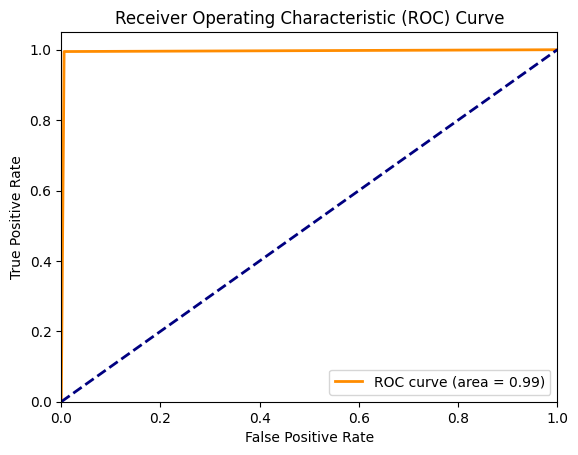

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [46]:
news=str(input())
manual_testing(news)

 ad the latest Today's News and updates on politics, auto, technology, mutual funds and more on mint. Get compr




LR prediction: Fake news 
DT prediction: Fake news 
GBC prediction :Fake news 
RFC prediction: Fake news


In [48]:
import  pickle 
file =open('svm_model.pkl','wb')
pickle.dump(svm_model,file)